#Prediction New Death Cases Global Covid-19 Cases


### Load Data and Import Libraries Section

In [1]:
# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
%tensorflow_version 2.x # make sure that collab use tensorflow 2
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import datetime
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # make sure that collab use tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# !rm '/root/.keras/datasets/global_total.csv'

###Load Data

In [0]:

df_new_cases = pd.read_csv("https://raw.githubusercontent.com/virgiawan/covid-19-prediction/linear-regression/dataset/corona-virus/new_cases.csv")
df_total_cases = pd.read_csv("https://raw.githubusercontent.com/virgiawan/covid-19-prediction/linear-regression/dataset/corona-virus/total_cases.csv")
df_new_deaths = pd.read_csv("https://raw.githubusercontent.com/virgiawan/covid-19-prediction/linear-regression/dataset/corona-virus/new_deaths.csv")
df_new_deaths = pd.read_csv("https://raw.githubusercontent.com/virgiawan/covid-19-prediction/linear-regression/dataset/corona-virus/new_deaths.csv")

In [60]:
np_data = np.array([df_new_cases['World'], df_total_cases['World'], df_new_deaths['World']]).T
dataset = pd.DataFrame({'new_cases': np_data[:, 0], 'total_cases': np_data[:, 1], 'new_deaths': np_data[:, 2]})
dataset

,new_cases,total_cases,new_deaths
0,27,27,0
1,0,27,0
2,0,27,0
3,17,44,0
4,0,44,0
...,...,...,...
99,74902,1391888,7412
100,84930,1476818,6339
101,87039,1563857,7223
102,89349,1653206,7049


###Data Exploration

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb6fb281d0>,
      dtype=object)

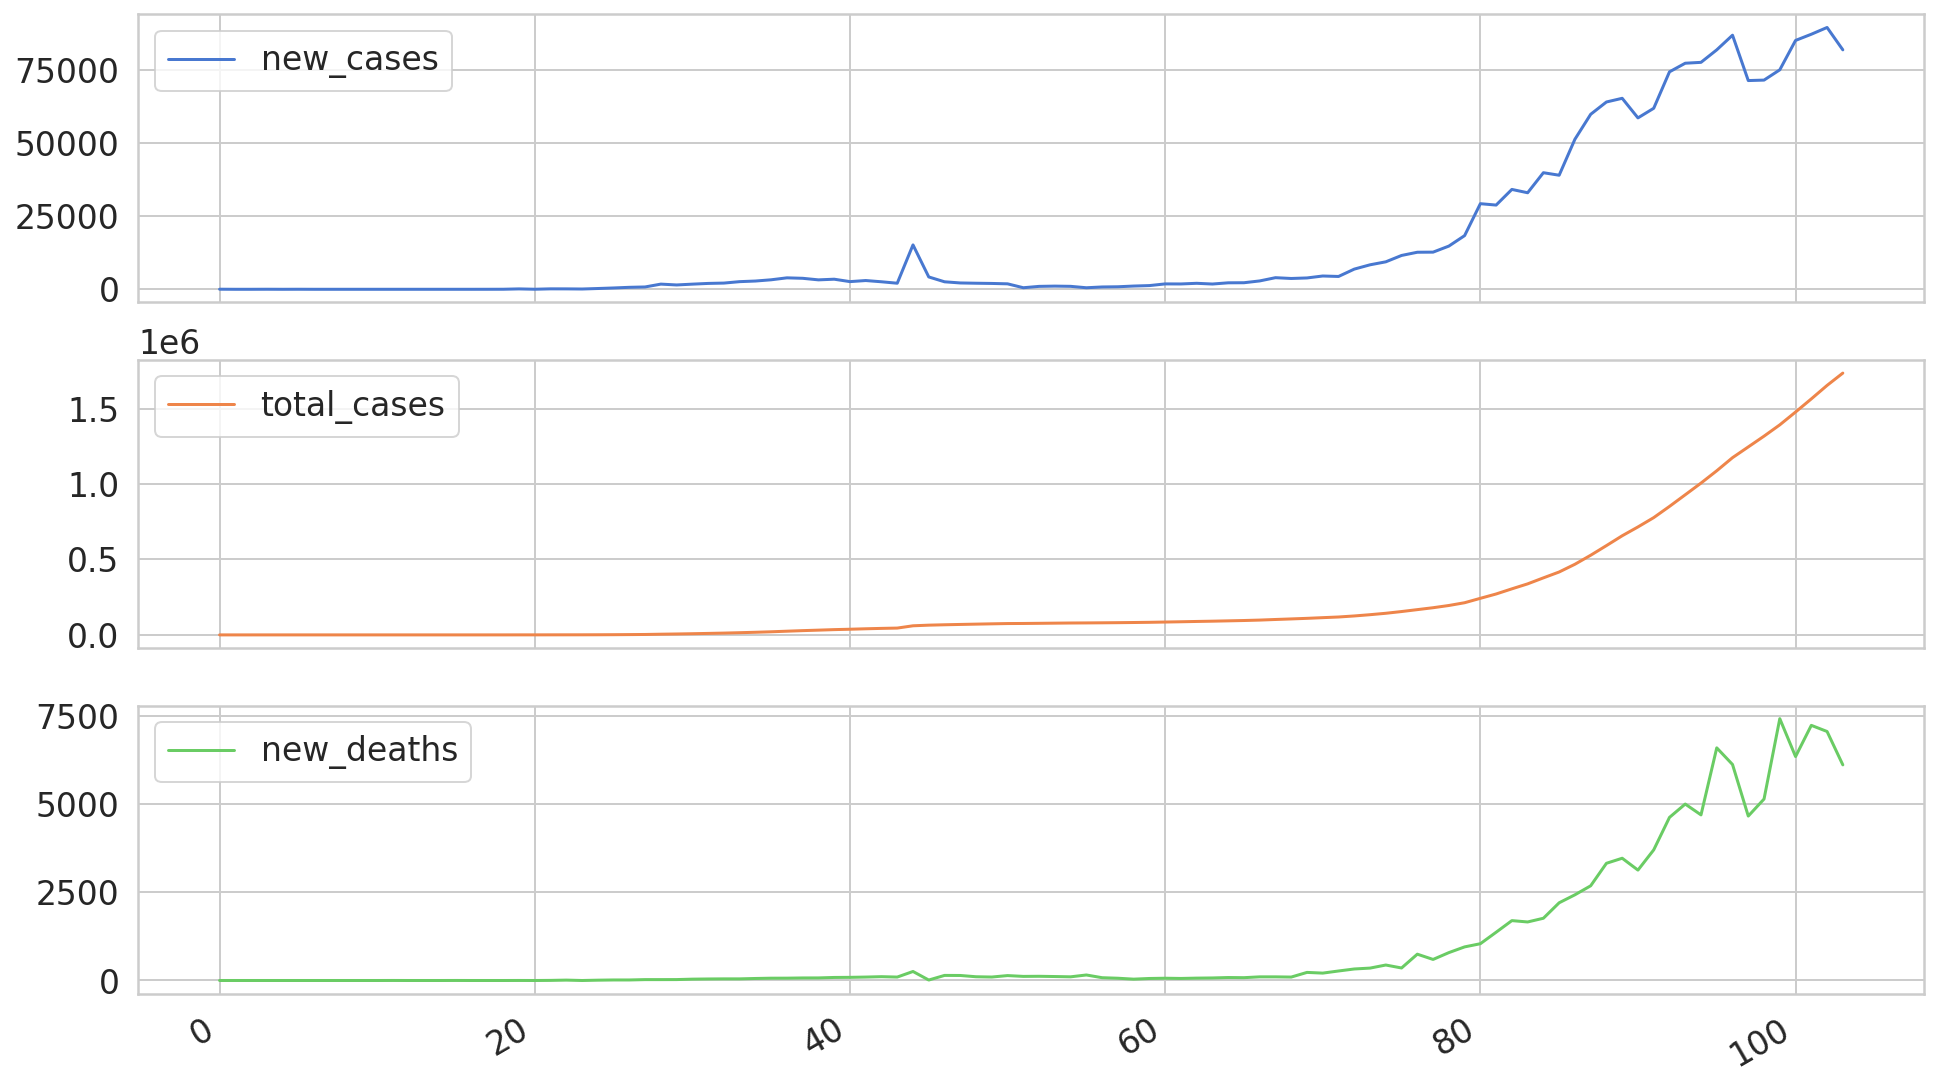

In [61]:
dataset.plot(subplots=True)

Coefisien correlation between new cases and new deaths 0.974596


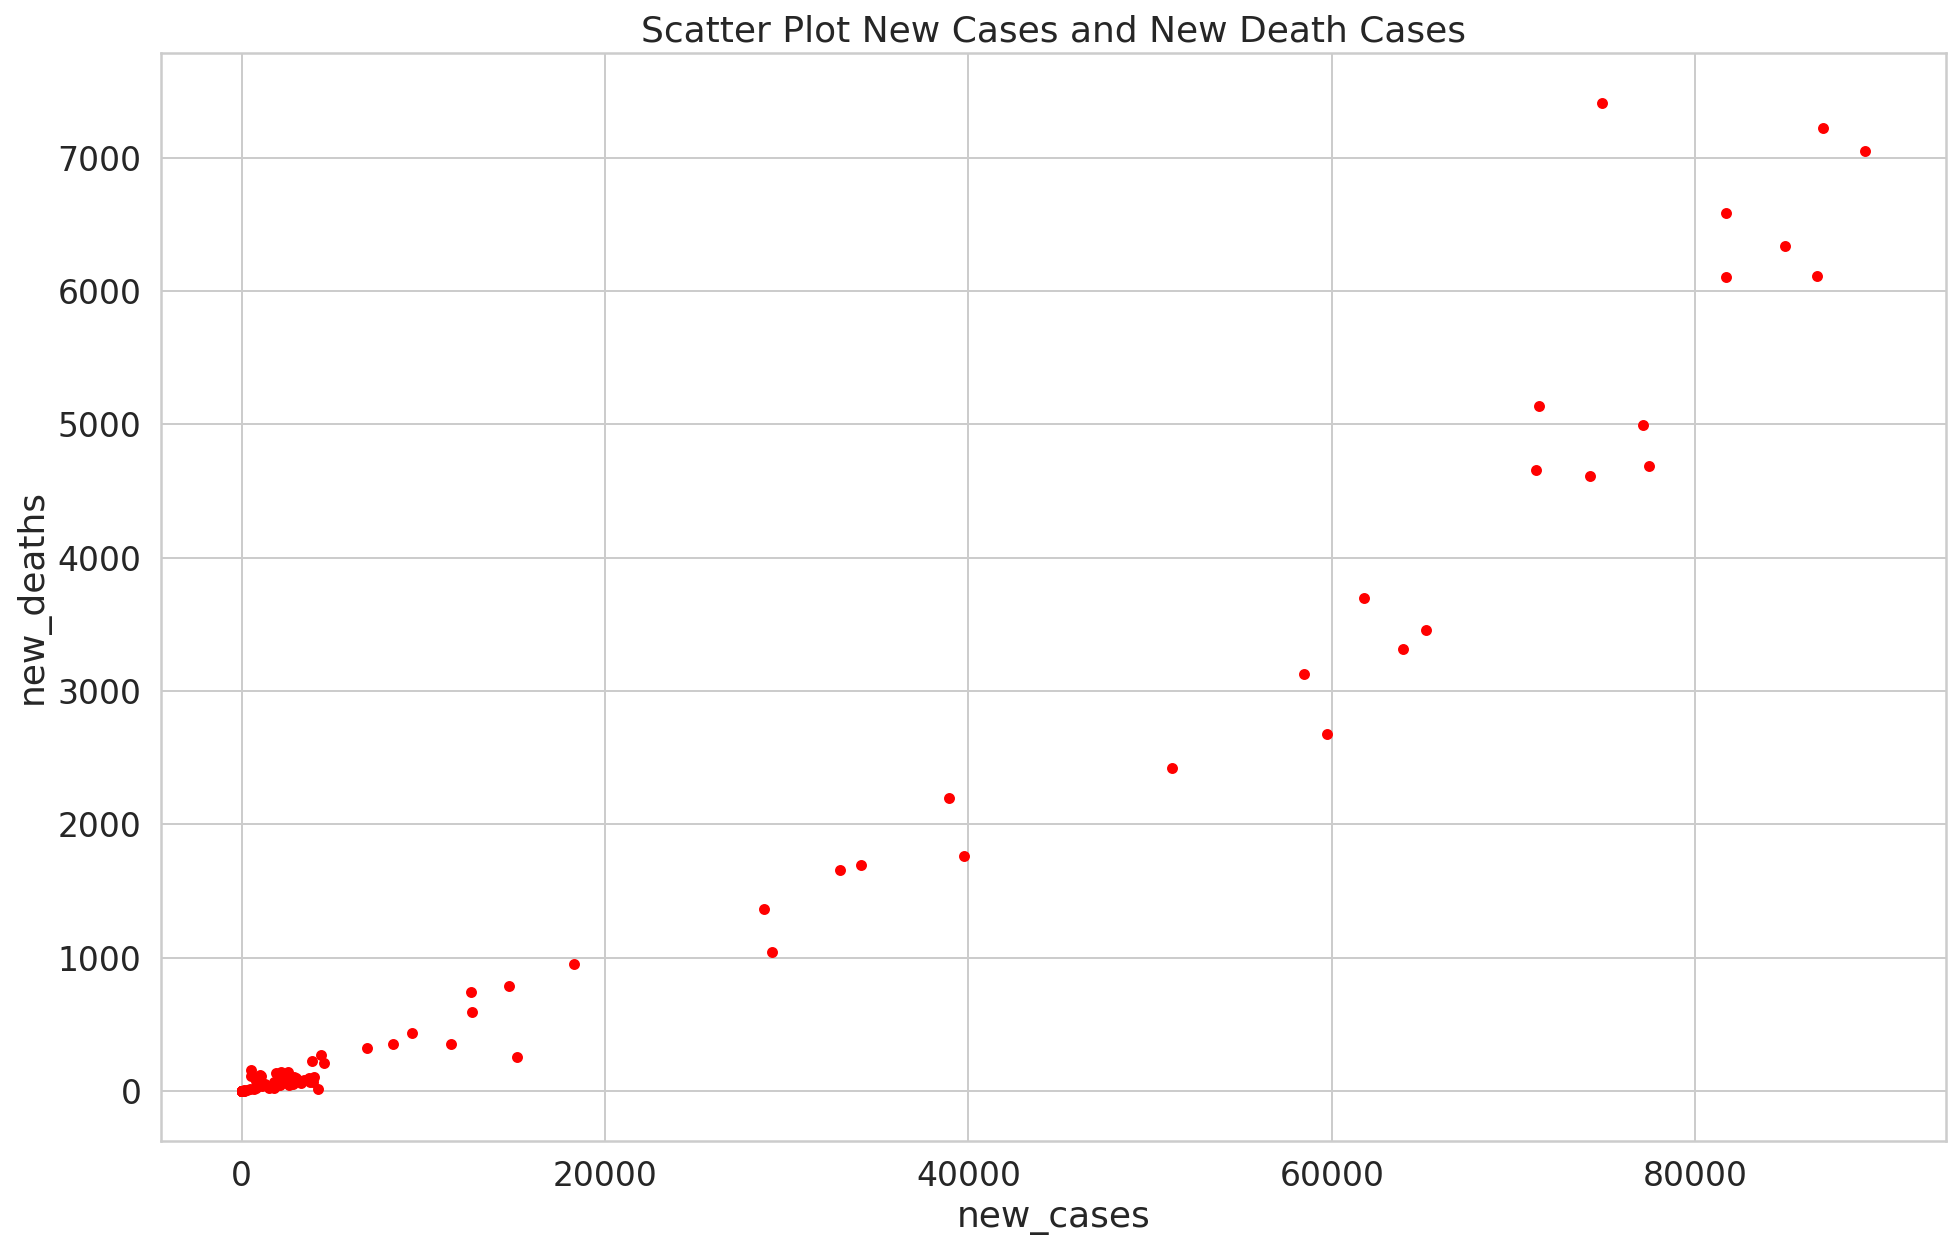

In [62]:
# Correlation between new_cases and new_deaths
cor_new_and_death_cases = np.corrcoef(dataset['new_cases'], 
                                      dataset['new_deaths'])[0, 1]
print("Coefisien correlation between new cases and new deaths %f" 
      %(cor_new_and_death_cases))
dataset.plot(kind='scatter', x='new_cases', 
             y='new_deaths', color='red', 
             title='Scatter Plot New Cases and New Death Cases')
plt.show()

Coefisien correlation between new cases and new deaths 0.982001


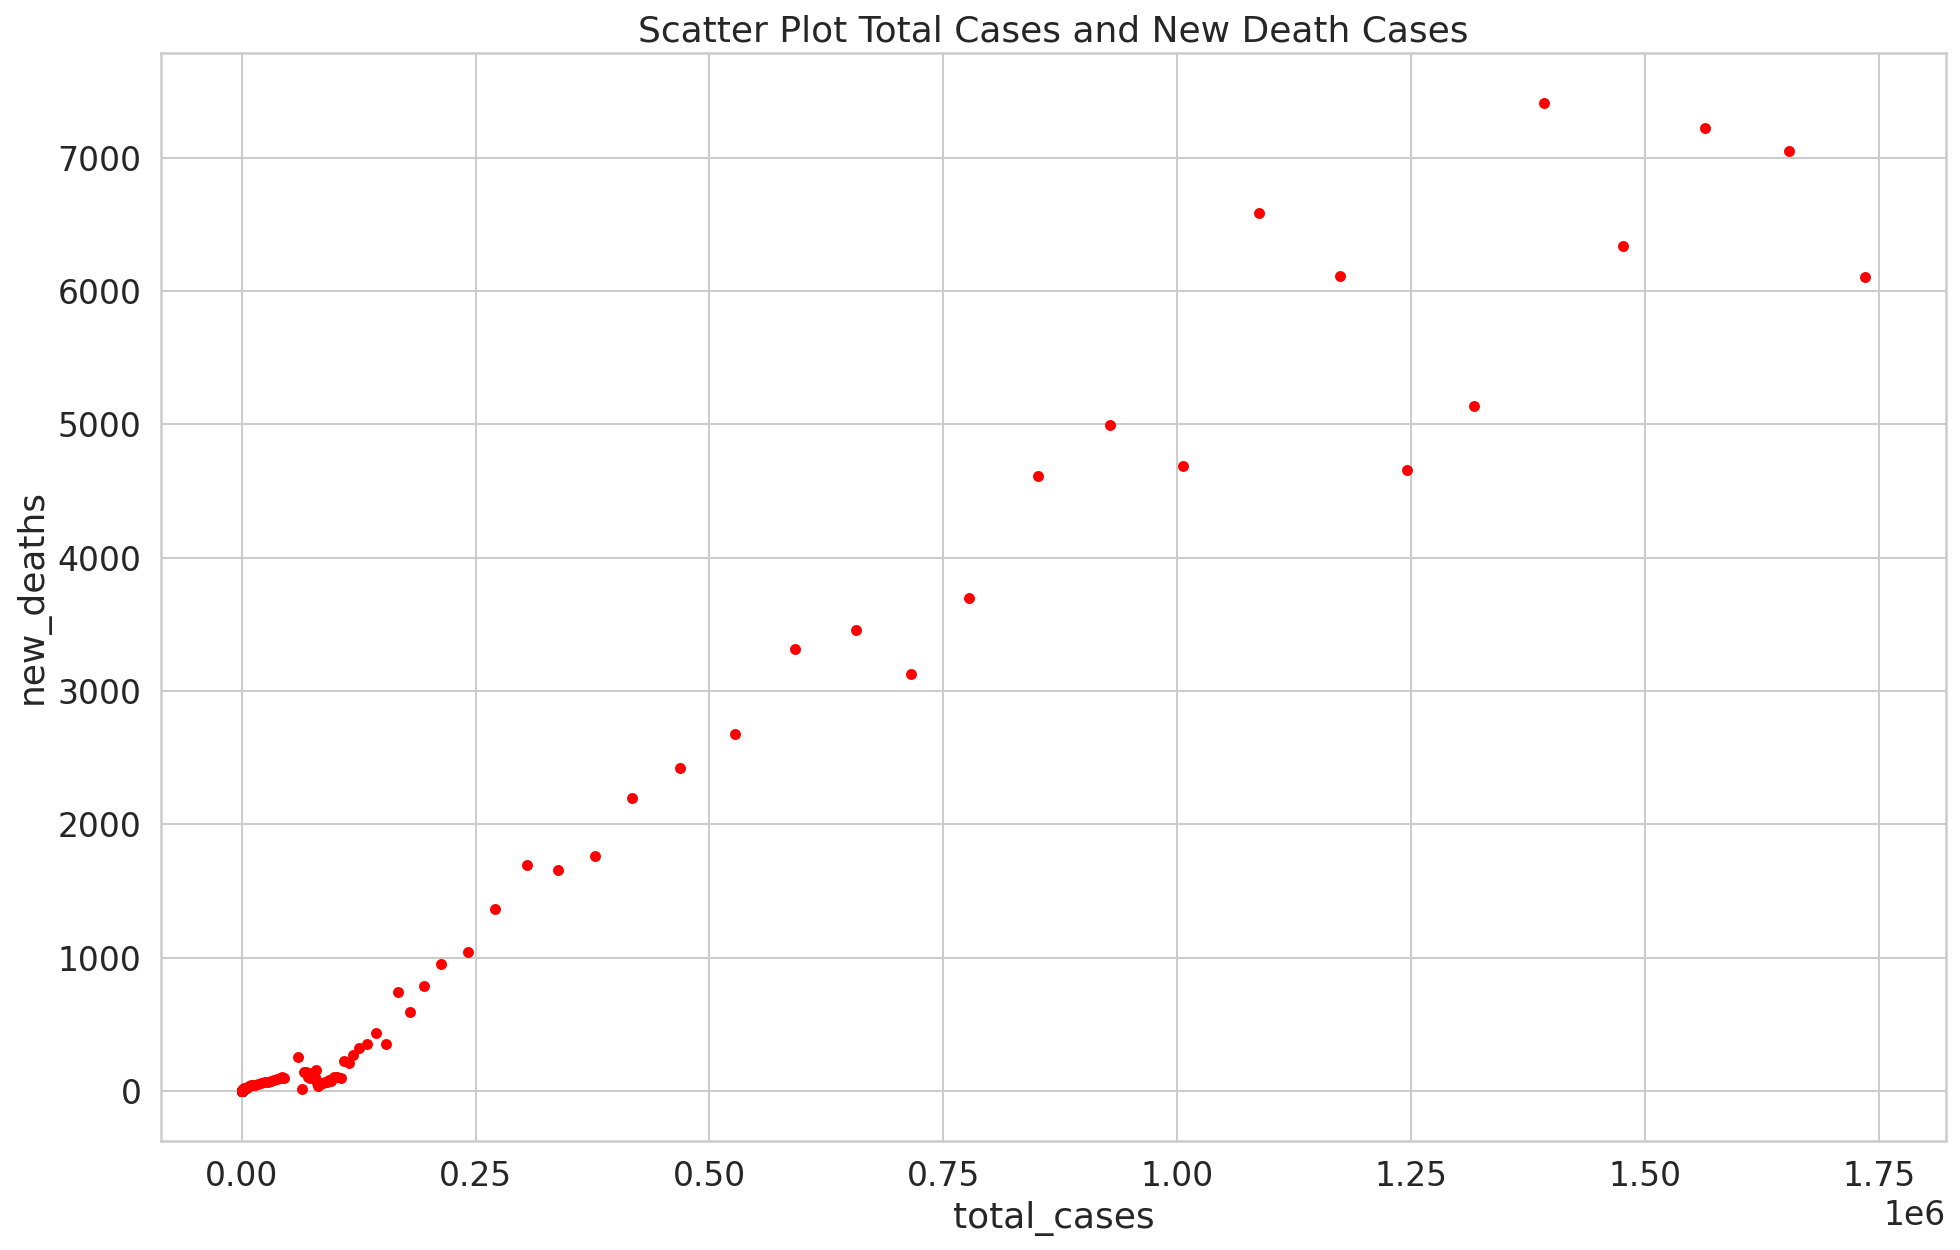

In [63]:
# Correlation between total_cases and new_deaths
cor_total_and_death_cases = np.corrcoef(dataset['total_cases'], 
                                      dataset['new_deaths'])[0, 1]
print("Coefisien correlation between new cases and new deaths %f" 
      %(cor_total_and_death_cases))
dataset.plot(kind='scatter', x='total_cases', 
             y='new_deaths', color='red', 
             title='Scatter Plot Total Cases and New Death Cases')
plt.show()

From scatter plot and cofisien correlation value, we can see that `new cases and new deaths` and `total cases and new deaths` have strong correlations

###Data Preprocessing

In [64]:

dataset = dataset[dataset['new_deaths'] != 0] # remove 0 value on new death cases
pd.set_option('display.max_rows', dataset.shape[0]+1)
dataset.index = pd.RangeIndex(len(dataset.index)) # reset index
dataset

,new_cases,total_cases,new_deaths
0,0,59,1
1,1,61,1
2,136,219,1
3,153,392,3
4,142,534,11
5,266,897,9
6,453,1350,15
7,673,2023,15
8,797,2820,25
9,1767,4587,25


#####Split the data (data training and testing)

In [0]:
train_size = int(len(dataset['new_cases']) * 0.7)
test_size = len(dataset['new_cases']) - train_size
train_new_cases, test_new_cases = dataset['new_cases'].iloc[0:train_size], dataset['new_cases'].iloc[train_size:len(dataset['new_cases'])]

In [0]:
train_size = int(len(dataset['total_cases']) * 0.7)
test_size = len(dataset['total_cases']) - train_size
train_total_cases, test_total_cases = dataset['total_cases'].iloc[0:train_size], dataset['total_cases'].iloc[train_size:len(dataset['total_cases'])]

In [0]:
train_size = int(len(dataset['new_deaths']) * 0.7)
test_size = len(dataset['new_deaths']) - train_size
train_new_deaths, test_new_deaths = dataset['new_deaths'].iloc[0:train_size], dataset['new_deaths'].iloc[train_size:len(dataset['new_deaths'])]

#####Normalize the data

In [0]:
def norm_data(all_data, reverse = False):
  if (reverse):
    return lambda data: (data * np.std(all_data)) + np.mean(all_data)
  else:
    return lambda data: (data - np.mean(all_data)) / np.std(all_data)

In [0]:
# normalize new cases
fun_norm_new_cases = norm_data(dataset['new_cases'])
norm_train_new_cases = fun_norm_new_cases(train_new_cases)
norm_test_new_cases = fun_norm_new_cases(test_new_cases)

# normalize total cases
fun_norm_total_cases = norm_data(dataset['total_cases'])
norm_train_total_cases = fun_norm_total_cases(train_total_cases)
norm_test_total_cases = fun_norm_total_cases(test_total_cases)

# normalize death cases
fun_norm_death_cases = norm_data(dataset['new_deaths'])
norm_train_death_cases = fun_norm_death_cases(train_new_deaths)
norm_test_death_cases = fun_norm_death_cases(test_new_deaths)

#####Prepare input data

In [110]:
train_input = np.vstack((norm_train_new_cases, norm_train_total_cases)).T
test_input = np.vstack((norm_test_new_cases, norm_test_total_cases)).T

# print shape data
print("train input shape %s" %(train_input.shape,))
print("test input shape %s" %(test_input.shape,))
print("train death cases shape %s" %(norm_train_death_cases.shape,))
print("test death cases shape %s" %(norm_test_death_cases.shape,))

train input shape (59, 2)
test input shape (26, 2)
train death cases shape (59,)
test death cases shape (26,)


### Create a model

In [0]:
def build_model(learning_rate = 0.001):
  model = keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[train_input.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
  return model

In [136]:
model = build_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_72 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 65        
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [137]:
EPOCHS = 1000

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') <= 0.2):
      print("\nReached loss below 20%, so cancelling training!")
      self.model.stop_training = True

accuracy_callback = myCallback()
history = model.fit(train_input, norm_train_death_cases,
                    epochs=EPOCHS,
                    callbacks=[tfdocs.modeling.EpochDots(), accuracy_callback])

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2762 - mse: 0.2762
Epoch: 0, loss:0.2525,  mse:0.2545,  
2/2 [==============================] - 0s 3ms/step - loss: 0.2525 - mse: 0.2545
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.2023 - mse: 0.2023.
Reached loss below 20%, so cancelling training!
2/2 [==============================] - 0s 2ms/step - loss: 0.1789 - mse: 0.1808


Loss: 1.629680
MSE: 1.629680


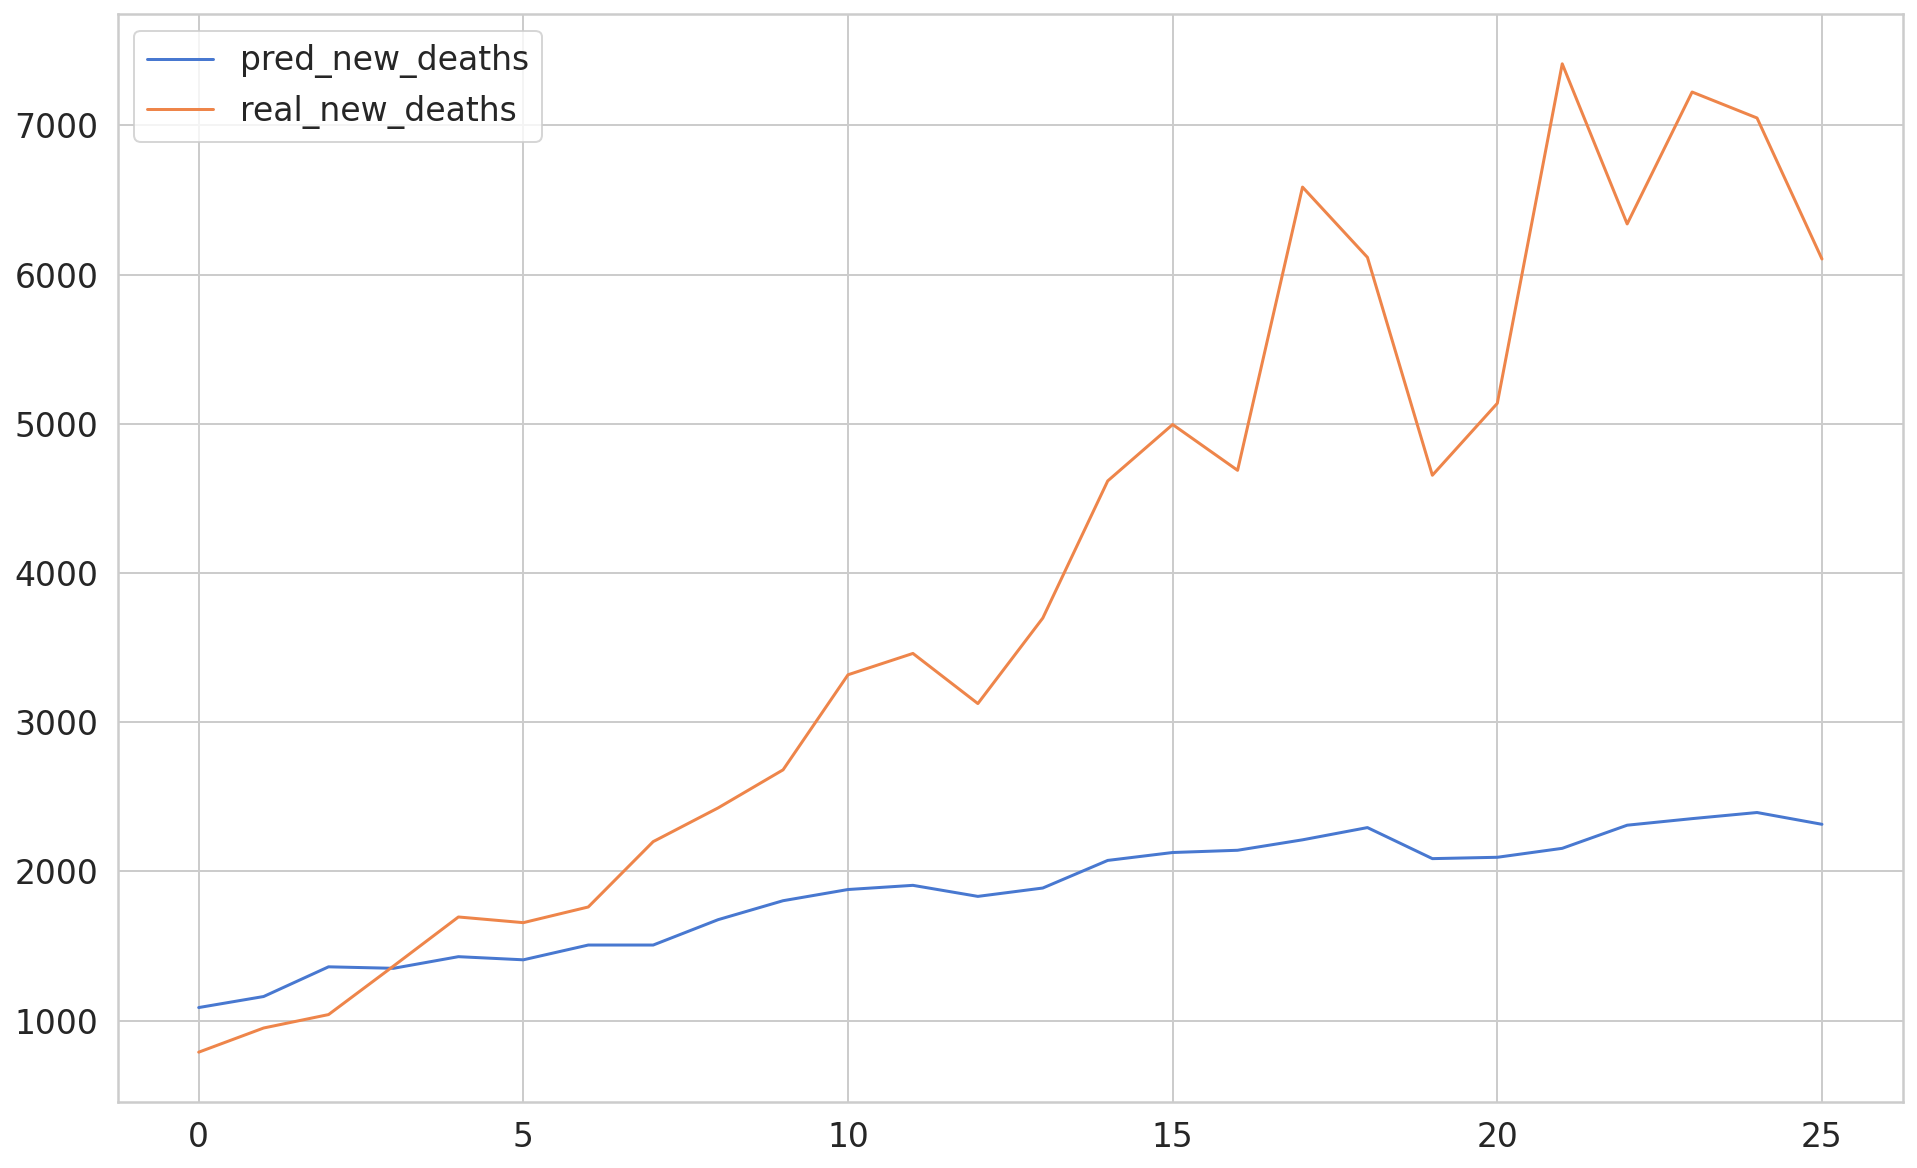

In [138]:
loss, mse = model.evaluate(test_input, norm_test_death_cases, verbose=0)


# try to predict the new death cases using test data
pred_norm_value = model.predict(test_input)
# create unormalize function
fun_unorm_death_cases = norm_data(dataset['new_deaths'], True)
pred_new_deaths = fun_unorm_death_cases(pred_norm_value)
pred_new_deaths = np.round(pred_new_deaths)

# try compare with real value
np_compare = np.array([pred_new_deaths.flatten(), test_new_deaths]).T
dt_compare = pd.DataFrame({'pred_new_deaths': np_compare[:, 0], 'real_new_deaths': np_compare[:, 1]})
dt_compare.plot()
print("Loss: %f" %(loss))
print("MSE: %f" %(mse))

In [139]:
dt_compare

,pred_new_deaths,real_new_deaths
0,1088.0,789.0
1,1162.0,951.0
2,1361.0,1041.0
3,1351.0,1366.0
4,1429.0,1695.0
5,1408.0,1657.0
6,1507.0,1762.0
7,1507.0,2200.0
8,1677.0,2426.0
9,1804.0,2681.0


In [76]:
list_date = (df_new_deaths['date'][(-1 * len(test_new_deaths)):]).tolist()
dt_compare.assign(date=list_date)
list_date


['2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12']